## Voting Classifier

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml

In [3]:
mnist = fetch_openml('mnist_784', version=1, as_frame=False) # False = not in Dataframe
mnist.target = mnist.target.astype(np.uint8)

In [4]:
mnist.data.shape

(70000, 784)

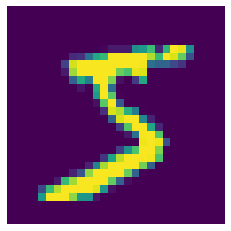

In [5]:
plt.imshow(mnist.data[0].reshape(28,28))
plt.axis('off');

In [6]:
# train, val, test
x_train_val, x_test, y_train_val, y_test = train_test_split(
    mnist.data, mnist.target, test_size=10000, random_state=42 
)

x_train, x_val, y_train, y_val = train_test_split(
    x_train_val, y_train_val, test_size=10000, random_state=42 
)

In [7]:
x_train_val.shape, x_test.shape, x_train.shape, x_val.shape

((60000, 784), (10000, 784), (50000, 784), (10000, 784))

In [8]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.svm import LinearSVC
from sklearn.neural_network import MLPClassifier

RDF_model = RandomForestClassifier(n_estimators=100, random_state=42)
EXT_model = ExtraTreesClassifier(n_estimators=100, random_state=42) 
SVM_model = LinearSVC(max_iter=100, tol=20, random_state=42) # Tolerance 
MLP_model = MLPClassifier(random_state=42)

> MLPClassifier stands for Multi-layer Perceptron classifier

In [9]:
estimators = [RDF_model, EXT_model, SVM_model, MLP_model]
for estimator in estimators :
    print(f'Training the {estimator} ...')
    estimator.fit(x_train, y_train)

Training the RandomForestClassifier(random_state=42) ...
Training the ExtraTreesClassifier(random_state=42) ...
Training the LinearSVC(max_iter=100, random_state=42, tol=20) ...
Training the MLPClassifier(random_state=42) ...


In [10]:
score = [estimator.score(x_val, y_val) for estimator in estimators]
for idx, estimator in enumerate(estimators):
    print(f'score = {score[idx]} | {estimator}')

score = 0.9692 | RandomForestClassifier(random_state=42)
score = 0.9715 | ExtraTreesClassifier(random_state=42)
score = 0.859 | LinearSVC(max_iter=100, random_state=42, tol=20)
score = 0.959 | MLPClassifier(random_state=42)


In [11]:
from sklearn.ensemble import VotingClassifier

estimators_name = [
    ('RandomForest', RDF_model),
    ('ExtraTree', EXT_model),
    ('SvmLinear',SVM_model ),
    ('MLP', MLP_model)
]

VOT_model = VotingClassifier(estimators_name)
VOT_model.fit(x_train, y_train)

VotingClassifier(estimators=[('RandomForest',
                              RandomForestClassifier(random_state=42)),
                             ('ExtraTree',
                              ExtraTreesClassifier(random_state=42)),
                             ('SvmLinear',
                              LinearSVC(max_iter=100, random_state=42, tol=20)),
                             ('MLP', MLPClassifier(random_state=42))])

In [12]:
print(f'score VOT_model = {VOT_model.score(x_val,y_val)}')

score VOT_model = 0.9703


> not good Let's remove SVM_model (it's worst performs)

In [13]:
VOT_model.estimators_

[RandomForestClassifier(random_state=42),
 ExtraTreesClassifier(random_state=42),
 LinearSVC(max_iter=100, random_state=42, tol=20),
 MLPClassifier(random_state=42)]

In [14]:
del VOT_model.estimators_[2]
VOT_model.estimators_


[RandomForestClassifier(random_state=42),
 ExtraTreesClassifier(random_state=42),
 MLPClassifier(random_state=42)]

In [15]:
print(f'score VOT_model = {VOT_model.score(x_val,y_val)}')

score VOT_model = 0.9732


> A bit better! ,Now let's try using a soft voting classifier.

In [16]:
VOT_model.voting = 'soft'
print(f'score VOT_model = {VOT_model.score(x_val,y_val)}')

score VOT_model = 0.9684


> Nope, hard voting wins in this case.

In [17]:
VOT_model.voting = 'hard'
print(f'score VOT_model = {VOT_model.score(x_val,y_val)}')

score VOT_model = 0.9732
